In [22]:
# Basic
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from joblib import dump, load
import pickle

# SHAP
import shap

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# import graphviz
%matplotlib inline

# glance wd
os.getcwd()

'/home/jhou2/HSV434/LandscapeProject/HSV434-IFNG-mechanism'

In [23]:
os.chdir('/home/jhou2/HSV434/LandscapeProject/HSV434-IFNG-mechanism')

In [24]:
# load data
with open('Processed/HSV434_Tcell_IFNG_mechanism_ML_UnderSampling_Final_data.pickle', 'rb') as file:
    X, X_train, X_test, X_train_scaled, X_test_scaled, y, y_train, y_test = pickle.load(file)

In [26]:
# Load RF model
RF_class_best = load('Model/UnderSampling_RF_class_best')

In [28]:
# Run SHAP on RF model
RF_explainer = shap.TreeExplainer(RF_class_best)
RF_shap_values = RF_explainer.shap_values(X_test)

In [36]:
# Precheck and then select some features have biological potentials
columns_of_interest = ['CD69', 'JUND', 'JUN', 'FOS', 'NR4A2', 
                       'DUSP1',  'KLF6', 'HOPX', 'CCL5', 'CCL4', 
                       'EEF1A1', 'SLC25A6', 'IL7R']

# Get the column indices for SHAP slicing
column_indices = [X_test.columns.get_loc(c) for c in columns_of_interest]

# Slice SHAP values and feature data correctly
RF_filtered_shap_explanation = shap.Explanation(
    values=RF_shap_values[:, column_indices, 1],  # SHAP values for class 1
    data=X_test.iloc[:, column_indices].values,   # matching feature values
    feature_names=columns_of_interest             # selected feature names
)

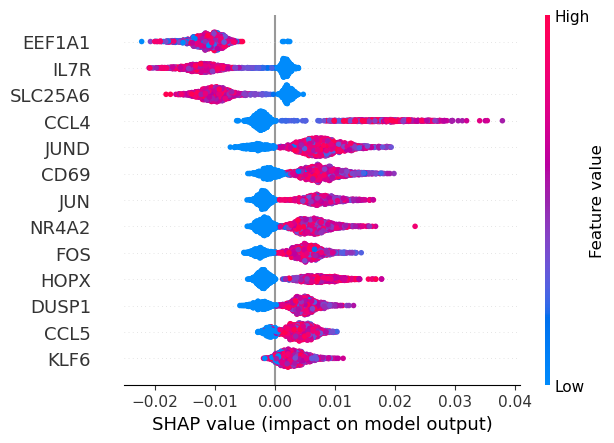

In [48]:
fig, ax = plt.subplots()
shap.plots.beeswarm(RF_filtered_shap_explanation, max_display=100, show=True, ax=ax, plot_size=None)
fig.set_size_inches(12, 6)
fig.savefig("Results/RF_SHAP_beeswarm_plot.png", dpi=300, bbox_inches="tight")
plt.close(fig)

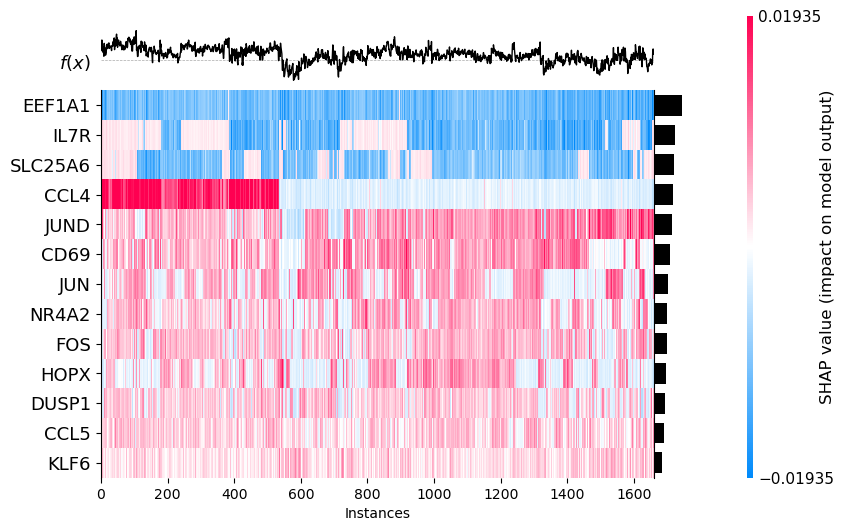

In [47]:
fig, ax = plt.subplots(figsize=(12, 6))
shap.plots.heatmap(RF_filtered_shap_explanation, max_display=100, show=True, ax=ax)
fig.savefig("Results/RF_SHAP_heatmap_plot.png", dpi=300, bbox_inches="tight")
plt.close(fig)

In [31]:
# Load XGBoost Model
xgb_class_best = load('Model/UnderSampling_XGB_class_best')

In [32]:
# Run SHAP on XGBoost
xgb_explainer = shap.TreeExplainer(xgb_class_best)
xgb_shap_values = xgb_explainer.shap_values(X_test)

In [39]:
# Precheck and then select some features have biological potentials
columns_of_interest = ['CD69', 'JUND', 'JUN', 'FOS', 'NR4A2', 
                       'DUSP1',  'KLF6', 'HOPX', 'CCL5', 'CCL4', 
                       'EEF1A1', 'SLC25A6', 'IL7R']

# Get the column indices for SHAP slicing
column_indices = [X_test.columns.get_loc(c) for c in columns_of_interest]

# Slice SHAP values and feature data correctly
XGB_filtered_shap_explanation = shap.Explanation(
    values=xgb_shap_values[:, column_indices],
    data=X_test.iloc[:, column_indices].values,
    feature_names=columns_of_interest            
)

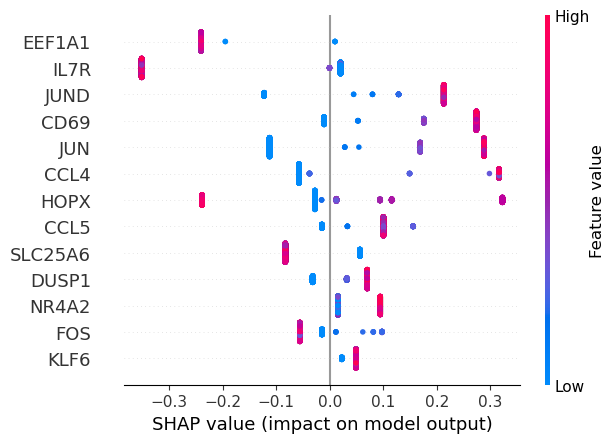

In [49]:
fig, ax = plt.subplots()
shap.plots.beeswarm(XGB_filtered_shap_explanation, max_display=100, show=True, ax=ax, plot_size=None)
fig.set_size_inches(12, 6)
fig.savefig("Results/XGB_SHAP_beeswarm_plot.png", dpi=300, bbox_inches="tight")
plt.close(fig)

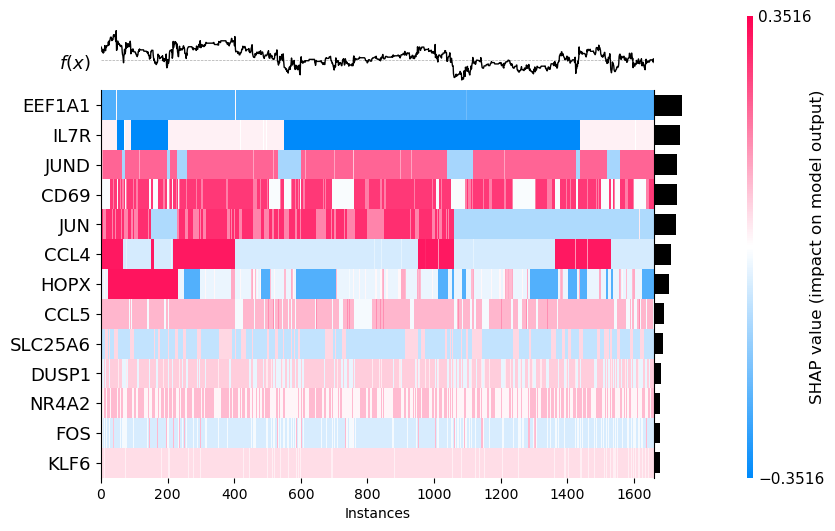

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
shap.plots.heatmap(XGB_filtered_shap_explanation, max_display=100, show=True, ax=ax)
fig.savefig("Results/XGB_SHAP_heatmap_plot.png", dpi=300, bbox_inches="tight")
plt.close(fig)